<h1>本章目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MovieLens电影推荐" data-toc-modified-id="MovieLens电影推荐-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MovieLens电影推荐</a></span><ul class="toc-item"><li><span><a href="#问题情境" data-toc-modified-id="问题情境-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>问题情境</a></span></li><li><span><a href="#Apriori算法原理" data-toc-modified-id="Apriori算法原理-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Apriori算法原理</a></span></li><li><span><a href="#数据导入" data-toc-modified-id="数据导入-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>数据导入</a></span><ul class="toc-item"><li><span><a href="#数据源" data-toc-modified-id="数据源-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>数据源</a></span></li><li><span><a href="#准备工作" data-toc-modified-id="准备工作-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>准备工作</a></span></li><li><span><a href="#数据导入" data-toc-modified-id="数据导入-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>数据导入</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#算法实现——手工版" data-toc-modified-id="算法实现——手工版-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>算法实现——手工版</a></span><ul class="toc-item"><li><span><a href="#挖掘频繁项集" data-toc-modified-id="挖掘频繁项集-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>挖掘频繁项集</a></span></li><li><span><a href="#抽取关联规则" data-toc-modified-id="抽取关联规则-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>抽取关联规则</a></span></li></ul></li><li><span><a href="#算法实现——mlxtend版" data-toc-modified-id="算法实现——mlxtend版-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>算法实现——mlxtend版</a></span><ul class="toc-item"><li><span><a href="#mlxtend简介" data-toc-modified-id="mlxtend简介-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>mlxtend简介</a></span></li><li><span><a href="#挖掘频繁项集" data-toc-modified-id="挖掘频繁项集-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>挖掘频繁项集</a></span></li><li><span><a href="#抽取关联规则" data-toc-modified-id="抽取关联规则-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>抽取关联规则</a></span></li></ul></li><li><span><a href="#算法实现——借助R来实现" data-toc-modified-id="算法实现——借助R来实现-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>算法实现——借助R来实现</a></span><ul class="toc-item"><li><span><a href="#准备工作" data-toc-modified-id="准备工作-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>准备工作</a></span></li><li><span><a href="#抽取关联规则并可视化" data-toc-modified-id="抽取关联规则并可视化-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>抽取关联规则并可视化</a></span></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>小结</a></span></li></ul></li></ul></div>

# MovieLens电影推荐

## 问题情境

我们在向别人推销数据挖掘时，通常我们都会说数据挖掘能“发现数据背后的规律”，并且经常是“意想不到的、新奇的”规律。通常会举啤酒和尿布的例子——啤酒与尿布的故事，或许是有史以来推销数据挖掘最好的广告之一!<br>
<img src=figtabs/ch4/beer_diapers.png align=center width=30% height=30% />

故事有多个版本，其中一个版本是：<br>
沃尔玛在美国的一家分店发生过这样一件趣事:在一个夏季，管理者发现在那段时间里婴儿尿布和啤酒的销量次第拔高。这如果在一般的商店也许就会被忽略，但沃尔玛超市的管理者没有轻易放过。他们立即对这个现象进行了分析和讨论，并且派出了专门的队伍在卖场内进行全天候的观察。最后，谜底终于水落石出：原来，购买这两种产品的顾客一般都是年龄在25至35周岁的青年男子，由于孩子尚在哺乳期，所以每天下班后他们都会遵太太的命令到超市里为孩子购买婴儿纸尿裤，每当这个时候，他们大都会为自己顺带买回几瓶啤酒。<br>
沃尔玛的管理者立即针对此现象采取了行动：将卖场内原来相隔很远的妇婴用品区与酒类饮料区的空间距离拉近，减少顾客的行走时间。

尽管啤酒和尿布的故事是杜撰的，但是通过数据来挖掘事物之间的关联关系，却在很多场合都有应用，比如：<br>
<img src=figtabs/ch4/jd_recommendation.png align=center width=50% height=50% />

又比如：<br>
<img src=figtabs/ch4/EI_village_recommendation.png align=center width=50% height=50% />

关联分析旨在事务、关系数据库中的项集和对象中发现频繁模式、伴随过程、相依性、相关性乃至可能的因果结构。关联分析虽然通常被称之为购物篮分析，但其应用场景已经远远超出了“购物”的范畴：<br>
* 购物篮分析（优化货架商品摆放、优化邮寄商品目录的内容、交叉销售和捆绑销售、……）
* web分析
* 生物信息学（DNA对新药敏感性分析）
* 地球科学
* ……<br>

本实验将以电影推荐为例，简述关联规则的原理及其应用。

## Apriori算法原理

关联分析（Association Analysis）用于发现隐藏在大型数据集中有意义的联系，所发现的联系可以用频繁项集或关联规则的形式表示<br>
* 频繁项集（frequent item sets）是经常出现在一块的物品的集合
* 关联规则（association rules），形如$A \Rightarrow B$的蕴含式，$A$发生的情况之下，$B$可能也伴随发生，暗示两种物品之间可能存在很强的关系。

---

以下是一些基本概念：<br>

* 项item的集合称为项集itemset
* 包含k个项的项集称为k-项集
* 项集出现的频度是包含该项集的事务数，简称为项集的频度、支持度计数
* 如果项集的支持度满足预定义的最小支持度阈值，称之为频繁项集frequent itemset  

---

关联规则是一个蕴涵式：𝐴⇒𝐵，其中𝐴和𝐵是不相交的项集  
具体含义是：𝐴出现的时候，𝐵也出现；或者说，𝐵伴随着𝐴出现  
关联规则在事务集𝑇中成立，所具有支持度和置信度：  
* 一个项集的支持度（support）被定义为数据集中包含该项集的记录所占的比例：$support\left( {A \Rightarrow B} \right) = P\left( {A \cup B} \right)$
* 置信度则是针对规则来定义的：$confidence\left( {A \Rightarrow B} \right) = P\left( {B|A} \right) = \frac{{P\left( {A \cup B} \right)}}{{P\left( A \right)}} = \frac{{support\_count\left( {A \cup B} \right)}}{{support\_coun\left( A \right)}}$

* **支持度**：减少偶然性  
* **置信度**：增加推断能力  
* 满足最小支持度和置信度的规则称为强规则

---

除了支持度和置信度之外，提升度也是常用的一个指标：  
**提升度**：  
$lift\left( {A \Rightarrow B} \right) = \frac{{P\left( {A \cup B} \right)}}{{P\left( A \right)P\left( A \right)}}$

* 如果提升度小于1，则A的出现和B的出现是负相关的，意味着一个出现可能导致另一个不出现
* 如果提升度大于1，则A的出现和B的出现是正相关的，意味着一个出现蕴含另一个的出现
* 换言之，它评估一个的出现“提升”另一个出现的程度

Apriori算法的核心思想是利用先验规则：<br>
* 频繁项集的所有非空子集也一定是频繁的
* 非频繁项集的超集必定是非频繁的<br>
<img src=figtabs/ch4/freq_itemset_prune.png align=center width=50% height=50%>

算法过程可表述如下：<br>
<img src="figtabs/ch4/apriori_part_a.png" height=60% width=60% align=left />

由频繁的$k-1$项集，生成频繁的$k$项集候选，有多种办法：<br>
<img src=figtabs/ch4/ck_gen.png align=center width=40% height=40%>

<img src=figtabs/ch4/apriori_part_b.png align=left width=60% height=60% />

完成了频繁项集的挖掘，只是完成了关联规则挖掘两个步骤中的第一步：<br>
* （1）找出所有频繁项集，满足最小支持度
* （2）由频繁项集产生强关联规则，满足最小置信度

---

避免野蛮搜索：<br>
* （1）基于支持度对候选集进行剪枝
* （2）基于置信度对规则进行剪枝

---

如果$X \Rightarrow (Y - X)$不满足置信度阈值，则对于${X^{sub}} \subset X$的规则${X^{sub}} \Rightarrow Y - {X^{sub}}$也一定不满足置信度阈值!<br>
<img src=figtabs/ch4/rule_prune.png align=center width=50% height=50%>

## 数据导入

### 数据源

MovieLens 是历史最悠久的推荐系统。它由美国 Minnesota 大学计算机科学与工程学院的 GroupLens 项目组创办，是一个非商业性质的、以研究为目的的实验性站点。MovieLens 主要使用 Collaborative Filtering 和 Association Rules 相结合的技术，向用户推荐他们感兴趣的电影。

自打Netflix Prize奖项设立以来，美国明尼苏达大学的Grouplens研究团队公开了一系列用于测试推荐算法的数据集,包含多个用户对多部电影的评级数据，也包括电影元数据信息和用户属性信息。  这个数据集经常用来做推荐系统，机器学习算法的测试数据集。尤其在推荐系统领域，很多著名论文都是基于这个网站提供的数据集。   

MovieLens提供的电影评分数据集包含多个版本，如MovieLens 20M Dataset、MovieLens 100K Dataset、MovieLens 1M Dataset、MovieLens 10M Dataset、MovieLens Latest Datasets等多个版本，其中MovieLens Latest Datasets更新至2018年9月（Accessed on 2/17/2019）。  
本实验将采用稳定的基准数据集MovieLens 10M Dataset，数据集下载地址为：<http://grouplens.org/datasets/movielens/>。

<img src=figtabs/ch4/movielens_10m_url.png align=center width=50% height=50% />

当然，也可以直接进入[Permalink](http://grouplens.org/datasets/movielens/10m/)下载。  

关于这份数据即的信息，可参看相应的[文档](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt)
> u.data     -- The full u data set, 100000 ratings by 943 users on 1682 items.  
>              Each user has rated at least 20 movies.  Users and items are  
>              numbered consecutively from 1.  The data is randomly  
>              ordered. This is a tab separated list of   
>	         user id | item id | rating | timestamp.   
>              The time stamps are unix seconds since 1/1/1970 UTC     
> u.item     -- Information about the items (movies); this is a tab separated  
>              list of  
>              movie id | movie title | release date | video release date |  
>              IMDb URL | unknown | Action | Adventure | Animation |  
>              Children's | Comedy | Crime | Documentary | Drama | Fantasy |  
>              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |  
>              Thriller | War | Western |  
>              The last 19 fields are the genres, a 1 indicates the movie  
>              is of that genre, a 0 indicates it is not; movies can be in  
>              several genres at once.  
>              The movie ids are the ones used in the u.data data set.  

### 准备工作

导入相关模块：

In [ ]:
import os
import sys
import pandas as pd

### 数据导入

下载完成后，解压缩至datasets文件夹，并通过以下代码进行解析。

In [1]:
data_folder = os.path.join("datasets", "ml-100k")
ratings_filename = os.path.join(data_folder, "u.data")
ratings_filename

'datasets\\ml-100k\\u.data'

MovieLens数据集非常规整，但是有几点跟 pandas.read_csv 方法的默认设置有出入，所以要调整参数设置。第一个问题是数据集每行的几个数据之间用制表符而不是逗号分隔。其次，没有表头，这表示数据集的第一行就是数据部分，我们需要手动为各列添加名称。
加载数据集时，把分隔符设置为制表符，告诉pandas不要把第一行作为表头（ header=None ），设置好各列的名称。代码如下：

In [2]:
all_ratings = pd.read_csv(ratings_filename, 
                          delimiter="\t", 
                          header=None, 
                          names = ["UserID", "MovieID", "Rating", "Datetime"])

查看一下所读入的数据：

In [3]:
all_ratings.head()

,UserID,MovieID,Rating,Datetime
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


显然，这里的日期有误，需要进行解析：

In [4]:
all_ratings["Datetime"] = pd.to_datetime(all_ratings['Datetime'],unit='s')
all_ratings.head()

,UserID,MovieID,Rating,Datetime
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [5]:
all_ratings.shape

(100000, 4)

数据集是一个10万×4的一个DataFrame，有10万行评分记录，4列具体属性为：用户ID、电影ID、评分、日期。
MovieLens网站对该数据集的描述如下：
> This data set consists of:
>	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
>	* Each user has rated at least 20 movies. 
>  * Simple demographic info for the users (age, gender, occupation, zip)

>The data was collected through the MovieLens web site
>(movielens.umn.edu) during the seven-month period from September 19th, 
>1997 through April 22nd, 1998. 

In [6]:
len(all_ratings['UserID'].unique())

943

In [7]:
len(all_ratings['MovieID'].unique())

1682

以上结果与网站描述一致。

In [8]:
all_ratings[all_ratings["UserID"] == 675].sort_values("MovieID")

,UserID,MovieID,Rating,Datetime
81098,675,86,4,1998-03-10 00:26:14
90696,675,223,1,1998-03-10 00:35:51
92650,675,235,1,1998-03-10 00:35:51
95459,675,242,4,1998-03-10 00:08:42
82845,675,244,3,1998-03-10 00:29:35
53293,675,258,3,1998-03-10 00:11:19
97286,675,269,5,1998-03-10 00:08:07
93720,675,272,3,1998-03-10 00:07:11
73389,675,286,4,1998-03-10 00:07:11
77524,675,303,5,1998-03-10 00:08:42


## 数据预处理

数据挖掘的目标是生成如下形式的规则：<font color = 'green' face = 'italic'>**如果用户喜欢某些电影，那么他们也会喜欢这部电影**</font>。为此，先增加一列Favorable，来表示用户是否喜欢这部电影。

In [9]:
all_ratings["Favorable"] = all_ratings["Rating"] > 3
all_ratings.tail()

,UserID,MovieID,Rating,Datetime,Favorable
99995,880,476,3,1997-11-22 05:10:44,False
99996,716,204,5,1997-11-17 19:39:03,True
99997,276,1090,1,1997-09-20 22:49:55,False
99998,13,225,2,1997-12-17 22:52:36,False
99999,12,203,3,1997-11-19 17:13:03,False


In [10]:
all_ratings.UserID.max()

943

In [11]:
all_ratings[all_ratings["UserID"] == 1][:5]

,UserID,MovieID,Rating,Datetime,Favorable
202,1,61,4,1997-11-03 07:33:40,True
305,1,189,3,1998-03-01 06:15:28,False
333,1,33,4,1997-11-03 07:38:19,True
334,1,160,4,1997-09-24 03:42:27,True
478,1,20,4,1998-02-14 04:51:23,True


从数据集中选取一部分数据用作训练集，这能有效减少搜索空间，提升Apriori算法的速度。我们取前200名用户的打分数据。

In [12]:
ratings = all_ratings[all_ratings['UserID'].isin(range(500))]  # & ratings["UserID"].isin(range(100))]

In [13]:
ratings.shape

(56545, 5)

In [14]:
# We start by creating a dataset of each user's favourable reviews
favorable_ratings = ratings[ratings["Favorable"]]
favorable_ratings[:5]

,UserID,MovieID,Rating,Datetime,Favorable
5,298,474,4,1998-01-07 14:20:06,True
7,253,465,5,1998-04-03 18:34:27,True
11,286,1014,5,1997-11-17 15:38:45,True
12,200,222,5,1997-10-05 09:05:40,True
16,122,387,5,1997-11-11 17:47:39,True


In [15]:
favorable_reviews_by_users = dict((k, frozenset(v.values)) for k, v in favorable_ratings.groupby("UserID")["MovieID"])
len(favorable_reviews_by_users)

499

In [16]:
num_favorable_by_movie = ratings[["MovieID", "Favorable"]].groupby("MovieID").sum()
num_favorable_by_movie.sort_values("Favorable", ascending=False)[:5]

,Favorable
MovieID,
50,267.0
100,238.0
98,208.0
181,205.0
258,192.0


当然，我们现在能看到的只是MovieID，不想电影名称看起来那么直观，可以直接从u.item中获取相关信息，然后进行合并

In [17]:
moive_info_columns = ["MovieID", "Title", 'release_date', 'video_release_date',
                      'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                      'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                      'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi',
                      'Thriller', 'War', 'Western']
movie_info_filename = os.path.join(data_folder, "u.item")
movie_info = pd.read_csv(movie_info_filename,
                         delimiter="|",
                         header=None,
                         names=moive_info_columns,
                         encoding = "mac-roman")

In [18]:
movie_info.head()

,MovieID,Title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


从unkonw开始直到最后一列，均是指电影的类型。我们需要用到的，只有MovieID和Title两列。以下是具体合并代码：

In [19]:
ratings = pd.merge(ratings[['UserID', 'MovieID', 'Rating', 'Favorable']],
                   movie_info[['MovieID', 'Title']])

接下来，新建一个数据集，只包括用户喜欢某部电影的数据行。

In [20]:
favorable_ratings = ratings[ratings["Favorable"]]
favorable_ratings[:5]

,UserID,MovieID,Rating,Favorable,Title
2,226,242,5,True,Kolya (1996)
4,306,242,5,True,Kolya (1996)
5,296,242,4,True,Kolya (1996)
6,34,242,5,True,Kolya (1996)
7,271,242,4,True,Kolya (1996)


我们可以创建一个数据框，以便了解每部电影的影迷数量。

In [21]:
num_favorable_by_movie = ratings[["Title", "Favorable"]].groupby("Title").sum()
num_favorable_by_movie.sort_values("Favorable", ascending=False)[:5]

,Favorable
Title,
Star Wars (1977),267.0
Fargo (1996),238.0
"Silence of the Lambs, The (1991)",208.0
Return of the Jedi (1983),205.0
Contact (1997),192.0


在生成项集时，需要搜索用户喜欢的电影。因此，接下来，我们需要知道每个用户各喜欢哪些电影，按照User ID进行分组，并遍历每个用户看过的每一部电影。

In [22]:
favorable_reviews_by_users_list = [list(v.values) for k, v in favorable_ratings.groupby("UserID")["Title"]]

In [23]:
favorable_reviews_by_users_list[1:3]

[['Kolya (1996)',
  'L.A. Confidential (1997)',
  'Men in Black (1997)',
  'Toy Story (1995)',
  'Restoration (1995)',
  'Fly Away Home (1996)',
  'Fargo (1996)',
  'Jerry Maguire (1996)',
  'Truth About Cats & Dogs, The (1996)',
  'Birdcage, The (1996)',
  'Sense and Sensibility (1995)',
  'Good Will Hunting (1997)',
  'Postino, Il (1994)',
  'Heat (1995)',
  "My Best Friend's Wedding (1997)",
  'Godfather, The (1972)',
  "Ulee's Gold (1997)",
  'English Patient, The (1996)',
  'Once Upon a Time... When We Were Colored (1995)',
  'Star Wars (1977)',
  'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)',
  'In & Out (1997)',
  'Tin Cup (1996)',
  'Rosewood (1997)',
  'Donnie Brasco (1997)',
  'Mighty Aphrodite (1995)',
  'Breakdown (1997)',
  'Full Monty, The (1997)',
  'Rainmaker, The (1997)',
  'Secrets & Lies (1996)',
  'Shall We Dance? (1996)',
  'Hoodlum (1997)',
  'Emma (1996)',
  'As Good As It Gets (1997)',
  'Time to Kill, A (1996)',
  'Air Force One (1997)',
  'Leaving Las Vegas (1

In [24]:
favorable_reviews_by_users = dict((k, frozenset(v.values)) for k, v in favorable_ratings.groupby("UserID")["Title"])

上面的代码把 v.values 存储为 frozenset ，便于快速判断用户是否为某部电影打过分。对于这种操作，集合比列表速度快。

比如UserID为173的用户，他喜欢的电影如下：

In [25]:
favorable_reviews_by_users[173]

frozenset({'Air Force One (1997)',
           'Career Girls (1997)',
           'Chasing Amy (1997)',
           'Conspiracy Theory (1997)',
           'Contact (1997)',
           'Cop Land (1997)',
           "Dante's Peak (1997)",
           'Desperate Measures (1998)',
           "Devil's Own, The (1997)",
           'Edge, The (1997)',
           'English Patient, The (1996)',
           'Event Horizon (1997)',
           'Everyone Says I Love You (1996)',
           'Evita (1996)',
           'Full Monty, The (1997)',
           'G.I. Jane (1997)',
           'Hoodlum (1997)',
           'Ice Storm, The (1997)',
           'In & Out (1997)',
           'In the Company of Men (1997)',
           'Kiss Me, Guido (1997)',
           'Kiss the Girls (1997)',
           'Kolya (1996)',
           'L.A. Confidential (1997)',
           'Liar Liar (1997)',
           'Lost Highway (1997)',
           'Mother (1996)',
           'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)',
           '

下面这种方式可能更好一点：

In [26]:
favorable_reviews_by_users.get(2)

frozenset({'Air Force One (1997)',
           'As Good As It Gets (1997)',
           'Birdcage, The (1996)',
           'Breakdown (1997)',
           'Donnie Brasco (1997)',
           'Emma (1996)',
           'English Patient, The (1996)',
           'Fargo (1996)',
           'Fly Away Home (1996)',
           'Full Monty, The (1997)',
           'Godfather, The (1972)',
           'Good Will Hunting (1997)',
           'Heat (1995)',
           'Hoodlum (1997)',
           'In & Out (1997)',
           'Jerry Maguire (1996)',
           'Kolya (1996)',
           'L.A. Confidential (1997)',
           'Leaving Las Vegas (1995)',
           'Men in Black (1997)',
           'Mighty Aphrodite (1995)',
           'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)',
           "My Best Friend's Wedding (1997)",
           'Once Upon a Time... When We Were Colored (1995)',
           'Postino, Il (1994)',
           'Rainmaker, The (1997)',
           'Restoration (1995)',
           'Rosew

In [27]:
count = [len(value) for key, value in favorable_reviews_by_users.items()]

In [28]:
min(count)

3

In [29]:
max(count)

376

In [30]:
count.index(min(count))

154

## 算法实现——手工版

### 挖掘频繁项集

生成1-项集：

In [31]:
def gen_freq_1_itemsets_candidates(trans_list):
    C1 = []
    for tran in trans_list:
        for item in tran:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    return list(map(frozenset, C1))

扫描事务数据库，从频繁k-项集候选中得出频繁k-项集，并得到相应的支持度：

In [32]:
def scan_trans_db(trans_db, Ck, min_support):
    support_counts = {}
    for tran in trans_db:
        for candidate in Ck:
            if candidate.issubset(tran):
                if candidate not in support_counts.keys():
                    support_counts[candidate] = 1
                else:
                    support_counts[candidate] += 1
    num_trans = float(len(list(trans_db)))
    freq_k_itemsets = []
    support_counts2db = {}
    for key in support_counts:
        support = support_counts[key] / num_trans
        if support >= min_support:
            freq_k_itemsets.insert(0, key)
            support_counts2db[key] = support
    return freq_k_itemsets, support_counts2db

由频繁的k-1项集，生成频繁的k项集候选：

In [33]:
def gen_freq_k_candidates(freq_k_1_itemsets, k):
    candidates = []
    len_freq_k_1_itemsets = len(freq_k_1_itemsets)
    for i in range(len_freq_k_1_itemsets):
        for j in range(i+1, len_freq_k_1_itemsets):
            freq_k_1_a = list(freq_k_1_itemsets[i])[:(k-2)]
            freq_k_1_b = list(freq_k_1_itemsets[j])[:(k-2)]
            freq_k_1_a.sort()
            freq_k_1_b.sort()
            if freq_k_1_a == freq_k_1_b:
                candidates.append(freq_k_1_itemsets[i]|freq_k_1_itemsets[j])
    return candidates

挖掘频繁项集：

In [34]:
def apriori(trans_list, min_support = 0.25):
    C1 = gen_freq_1_itemsets_candidates(trans_list)
    trans_db = list(map(set, trans_list))
    freq_1_itemsets, support_db = scan_trans_db(trans_db, C1, min_support)
    freq_itemsets = [freq_1_itemsets]
    k = 2
    while (len(freq_itemsets[k - 2]) > 0):
        print("generating frequent {}-itemsets...".format(k))
        sys.stdout.flush()
        Ck = gen_freq_k_candidates(freq_itemsets[k-2], k)
        freq_k_itemsets, freq_k_itemsets_supports = scan_trans_db(trans_db, Ck, min_support)
        support_db.update(freq_k_itemsets_supports)
        freq_itemsets.append(freq_k_itemsets)
        k += 1
    return freq_itemsets, support_db

In [35]:
trans_list_manual = favorable_reviews_by_users_list.copy()
resulted_freq_itemsets, resulted_support_db = apriori(trans_list_manual, 50 / len(trans_list_manual))

generating frequent 2-itemsets...
generating frequent 3-itemsets...
generating frequent 4-itemsets...
generating frequent 5-itemsets...
generating frequent 6-itemsets...
generating frequent 7-itemsets...
generating frequent 8-itemsets...


对照一下前边的伪代码，以及这里的python实现，相信大家对python作为“可执行的伪代码”会有进一步的体会。

### 抽取关联规则

In [36]:
def calculate_confidence(freq_itemset, RHS, support_db, rules_list, min_confidence):
    pruned_lhs = []
    for rhs in RHS:
        conf = support_db[freq_itemset] / support_db[freq_itemset - rhs]
        support = support_db[freq_itemset]
        if conf >= min_confidence:
            #print(freq_itemset-rhs, "-->", rhs)
            print(support_db[freq_itemset])
            rules_list.append((freq_itemset-rhs, rhs, support, conf))
    return pruned_lhs

In [37]:
def rules_frm_consequence(freq_itemset, RHS, support_db, rules_list, min_confidence):
    m = len(RHS[0])
    if (len(freq_itemset) > m + 1):
        Hmp1 = gen_freq_k_candidates(RHS, m + 1)
        Hmp1 = calculate_confidence(freq_itemset, Hmp1, support_db, rules_list, min_confidence)
        if(len(Hmp1) > 1):
            rules_frm_consequence(freq_itemset, Hmp1, support_db, rules_list, min_confidence)

In [38]:
def generate_rules(freq_itemsets, support_db, min_confidence = 0.75):
    rules_list = []
    for i in range(1, len(freq_itemsets)):
        for cur_freq_itemset in freq_itemsets[i]:
            RHS = [frozenset([item]) for item in cur_freq_itemset]
            if(i > 1):
                rules_frm_consequence(cur_freq_itemset,
                                     RHS,
                                     support_db,
                                     rules_list,
                                     min_confidence)
            else:
                calculate_confidence(cur_freq_itemset,
                                    RHS,
                                    support_db,
                                    rules_list,
                                    min_confidence)
    return rules_list

In [39]:
rules_manual = generate_rules(resulted_freq_itemsets, resulted_support_db, min_confidence = 0.75)

0.12024048096192384
0.1062124248496994
0.1062124248496994
0.11422845691382766
0.12424849699398798
0.11623246492985972
0.11823647294589178
0.15831663326653306
0.15831663326653306
0.12224448897795591
0.10020040080160321
0.10220440881763528
0.10821643286573146
0.10220440881763528
0.10420841683366733
0.10020040080160321
0.10821643286573146
0.18036072144288579
0.11422845691382766
0.1062124248496994
0.10220440881763528
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10420841683366733
0.1062124248496994
0.13026052104208416
0.11022044088176353
0.10420841683366733
0.10821643286573146
0.1342685370741483
0.13827655310621242
0.11422845691382766
0.15430861723446893
0.15831663326653306
0.156312625250501
0.11222444889779559
0.11623246492985972
0.11422845691382766
0.12024048096192384
0.20040080160320642
0.1963927855711423
0.19839679358717435
0.10420841683366733
0.12224448897795591
0.12024048096192384
0.12625250501002003
0.13026052104208416
0.1402805611222445
0.1062124248496994
0.10420841

0.11222444889779559
0.11222444889779559
0.10821643286573146
0.10420841683366733
0.10821643286573146
0.11222444889779559
0.10420841683366733
0.11623246492985972
0.12024048096192384
0.11222444889779559
0.10420841683366733
0.10420841683366733
0.12224448897795591
0.11022044088176353
0.10420841683366733
0.11022044088176353
0.1282565130260521
0.1282565130260521
0.11022044088176353
0.1282565130260521
0.10220440881763528
0.11022044088176353
0.12424849699398798
0.1062124248496994
0.1062124248496994
0.11022044088176353
0.13226452905811623
0.11623246492985972
0.11022044088176353
0.10020040080160321
0.11022044088176353
0.1062124248496994
0.10420841683366733
0.10821643286573146
0.10020040080160321
0.13026052104208416
0.10020040080160321
0.10821643286573146
0.10821643286573146
0.11222444889779559
0.10220440881763528
0.1523046092184369
0.1062124248496994
0.10420841683366733
0.11422845691382766
0.11022044088176353
0.1062124248496994
0.10220440881763528
0.13026052104208416
0.12625250501002003
0.1062124

0.1623246492985972
0.1623246492985972
0.13627254509018036
0.11222444889779559
0.12625250501002003
0.1282565130260521
0.1062124248496994
0.11823647294589178
0.10220440881763528
0.1523046092184369
0.1523046092184369
0.13226452905811623
0.11623246492985972
0.11422845691382766
0.11022044088176353
0.10821643286573146
0.10420841683366733
0.12625250501002003
0.11422845691382766
0.11823647294589178
0.10821643286573146
0.11222444889779559
0.1062124248496994
0.11422845691382766
0.1402805611222445
0.14228456913827656
0.11022044088176353
0.14228456913827656
0.1402805611222445
0.1062124248496994
0.12224448897795591
0.12224448897795591
0.18236472945891782
0.12024048096192384
0.12024048096192384
0.12024048096192384
0.10020040080160321
0.14428857715430862
0.10420841683366733
0.14428857715430862
0.1523046092184369
0.1523046092184369
0.10821643286573146
0.11222444889779559
0.1683366733466934
0.1683366733466934
0.11422845691382766
0.11422845691382766
0.1282565130260521
0.10220440881763528
0.1242484969939

0.11022044088176353
0.12024048096192384
0.1062124248496994
0.1062124248496994
0.10020040080160321
0.10220440881763528
0.11422845691382766
0.14428857715430862
0.10821643286573146
0.12024048096192384
0.10420841683366733
0.10220440881763528
0.1062124248496994
0.1282565130260521
0.11022044088176353
0.10420841683366733
0.10420841683366733
0.11422845691382766
0.10420841683366733
0.10220440881763528
0.11823647294589178
0.11422845691382766
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.100200400801

0.11222444889779559
0.11222444889779559
0.11222444889779559
0.12625250501002003
0.12625250501002003
0.12625250501002003
0.12625250501002003
0.1062124248496994
0.1062124248496994
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10220440881763528
0.10220440881763528
0.10020040080160321
0.10220440881763528
0.10220440881763528
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.10020040080160321
0.10020040080160321
0.10420841683366733
0.10220440881763528
0.10220440881763528
0.10821643286573146
0.10821643286573146
0.10821643286573146
0.10821643286573146
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.11422845691382766
0.11422845691382766
0.11422

0.1062124248496994
0.1062124248496994
0.1062124248496994
0.11222444889779559
0.10821643286573146
0.10821643286573146
0.12424849699398798
0.12424849699398798
0.12424849699398798
0.12424849699398798
0.12424849699398798
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.13026052104208416
0.13026052104208416
0.13026052104208416
0.13026052104208416
0.12224448897795591
0.12224448897795591
0.12224448897795591
0.13226452905811623
0.13226452905811623
0.13226452905811623
0.13226452905811623
0.13226452905811623
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.11222444889779559
0.11222444889779559
0.1122244

0.10020040080160321
0.11823647294589178
0.11823647294589178
0.11823647294589178
0.11823647294589178
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.11823647294589178
0.11823647294589178
0.10020040080160321
0.10020040080160321
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.11623246492985972
0.11823647294589178
0.11823647294589178
0.11823647294589178
0.11623246492985972
0.11623246492985972
0.10821643286573146
0.10821643286573146
0.10821643286573146
0.10821643286573146
0.10821643286573146
0.10821643286573146
0.1062124248496994
0.1062124248496994
0.10420841683366733
0.10420841683366733
0.10020040080160321
0.10020040080160321
0.10821643286573146
0.10821643286573146
0.10821643286573146
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.12625250501002003
0.12625250501002003
0.12625250501002003
0.1282565130260521
0.1282

0.10220440881763528
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10220440881763528
0.10220440881763528
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.10020040080160321
0.10020040080160321
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.1062124248496994
0.1062124248496994
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.11222444889779559
0.11222444889779559
0.11222444889779559
0.11222444889779559
0.11222444889779559
0.11222444889779559
0.11823647294589178
0.11823647294589178
0.11823647294589178
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.10220440881763528
0.10220440881763528
0.

0.10821643286573146
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.11022044088176353
0.11022044088176353
0.11022044088176353
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10220440881763528
0.10420841683366733
0.10420841683366733
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.11222444889779559
0.11222444889779559
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.10020040080160321
0.11022044088176353
0.11022044088176353
0.12224448897795591
0.11422845691382766
0.11422845691382766
0.11422845691382766
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321


0.1062124248496994
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10220440881763528
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.1062124248496994
0.1062124248496994
0.1062124248496994
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10020040080160321
0.10420841683366733
0.10420841683366733
0.10420841683366733
0.1042084

In [40]:
resulted_freq_itemsets[0]

[frozenset({'Long Kiss Goodnight, The (1996)'}),
 frozenset({'That Thing You Do! (1996)'}),
 frozenset({'Mission: Impossible (1996)'}),
 frozenset({'Rock, The (1996)'}),
 frozenset({'Ransom (1996)'}),
 frozenset({'Sleepers (1996)'}),
 frozenset({'Twister (1996)'}),
 frozenset({'Saint, The (1997)'}),
 frozenset({'Dave (1993)'}),
 frozenset({'Apt Pupil (1998)'}),
 frozenset({'Sound of Music, The (1965)'}),
 frozenset({'Primal Fear (1996)'}),
 frozenset({'Philadelphia (1993)'}),
 frozenset({'People vs. Larry Flynt, The (1996)'}),
 frozenset({'Much Ado About Nothing (1993)'}),
 frozenset({"Singin' in the Rain (1952)"}),
 frozenset({'Game, The (1997)'}),
 frozenset({'Cape Fear (1991)'}),
 frozenset({'American President, The (1995)'}),
 frozenset({'Face/Off (1997)'}),
 frozenset({'In the Line of Fire (1993)'}),
 frozenset({'Stand by Me (1986)'}),
 frozenset({'Speed (1994)'}),
 frozenset({'Snow White and the Seven Dwarfs (1937)'}),
 frozenset({'Shining, The (1980)'}),
 frozenset({'Rear Window

In [41]:
rules_manual

[(frozenset({'Much Ado About Nothing (1993)'}),
  frozenset({'Star Wars (1977)'}),
  0.12024048096192384,
  0.8108108108108107),
 (frozenset({'Dave (1993)'}),
  frozenset({'Raiders of the Lost Ark (1981)'}),
  0.1062124248496994,
  0.8688524590163934),
 (frozenset({'Dave (1993)'}),
  frozenset({'Star Wars (1977)'}),
  0.1062124248496994,
  0.8688524590163934),
 (frozenset({'Sound of Music, The (1965)'}),
  frozenset({'Back to the Future (1985)'}),
  0.11422845691382766,
  0.75),
 (frozenset({'Sound of Music, The (1965)'}),
  frozenset({'Raiders of the Lost Ark (1981)'}),
  0.12424849699398798,
  0.8157894736842104),
 (frozenset({'Sound of Music, The (1965)'}),
  frozenset({'Silence of the Lambs, The (1991)'}),
  0.11623246492985972,
  0.763157894736842),
 (frozenset({'Sound of Music, The (1965)'}),
  frozenset({'Star Wars (1977)'}),
  0.11823647294589178,
  0.7763157894736841),
 (frozenset({'Seven (Se7en) (1995)'}),
  frozenset({'Pulp Fiction (1994)'}),
  0.15831663326653306,
  0.78217

In [42]:
pd.DataFrame(rules_manual, columns=['lhs', 'rhs','support', 'confidence'])

,lhs,rhs,support,confidence
0,(Much Ado About Nothing (1993)),(Star Wars (1977)),0.120240,0.810811
1,(Dave (1993)),(Raiders of the Lost Ark (1981)),0.106212,0.868852
2,(Dave (1993)),(Star Wars (1977)),0.106212,0.868852
3,"(Sound of Music, The (1965))",(Back to the Future (1985)),0.114228,0.750000
4,"(Sound of Music, The (1965))",(Raiders of the Lost Ark (1981)),0.124248,0.815789
5,"(Sound of Music, The (1965))","(Silence of the Lambs, The (1991))",0.116232,0.763158
6,"(Sound of Music, The (1965))",(Star Wars (1977)),0.118236,0.776316
7,(Seven (Se7en) (1995)),(Pulp Fiction (1994)),0.158317,0.782178
8,(Seven (Se7en) (1995)),"(Silence of the Lambs, The (1991))",0.158317,0.782178
9,(Beauty and the Beast (1991)),(Toy Story (1995)),0.122244,0.772152


## 算法实现——mlxtend版

### mlxtend简介

虽然本实验课程，大量使用的是sklearn作为建模工具，在具体开展试验过程中，我们也推荐一些机器学习常用的包，比如mlxtend、orange等，都是对sklearn非常好的补充：<br>
![img](figtabs/ch5/mlxtend.png)
- **classifier**
  + Adaline
  + EnsembleVoteClassifier
  + LogisticRegression
  + MultiLayerPerceptron
  + Perceptron
  + SoftmaxRegression
  + StackingClassifier
  + StackingCVClassifier
- **frequent_patterns**
  + apriori
  + association_rules
- **plotting**
  + category_scatter
  + checkerboard_plot
  + ecdf
  + enrichment_plot
  + plot_confusion_matrix
  + plot_decision_regions
  + plot_learning_curves
  + plot_linear_regression
  + plot_sequential_feature_selection
  + scatterplotmatrix
  + stacked_barplot  

关于mlxtend更详细的信息，可参阅：<http://rasbt.github.io/mlxtend/>

### 挖掘频繁项集

先来看一下mlxtend中频繁项集的挖掘：

**apriori** <br>
apriori(df, min_support=0.5, use_colnames=False, max_len=None, n_jobs=1)<br>
Get frequent itemsets from a <font color='green'>**one-hot DataFrame**</font> Parameters
* df : pandas DataFrame or pandas SparseDataFrame  
  pandas DataFrame the encoded format. The allowed values are either 0/1 or True/False.
* min_support : float (default: 0.5)  
  A float between 0 and 1 for minumum support of the itemsets returned. The support is computed as the fraction transactions_where_item(s)_occur / total_transactions.
* use_colnames : bool (default: False)  
  If true, uses the DataFrames' column names in the returned DataFrame instead of column indices.
* max_len : int (default: None)  
  Maximum length of the itemsets generated. If None (default) all possible itemsets lengths (under the apriori condition) are evaluated.  

**Returns**  
pandas DataFrame with columns ['support', 'itemsets'] of all itemsets that are >= min_support and < than max_len (if max_len is not None). Each itemset in the 'itemsets' column is of type frozenset, which is a Python built-in type that behaves similarly to sets except that it is immutable.

apriori所接收的参数形式比较单一，一般是独热码的形式：

| Transactions | item1 | item2 | item3 | item4 |
| :------ | :------: | :------: | :------: | :------: |
| transaction1 | 1 | 1 | 0 | 1 |
| transaction2 | 0 | 1 | 1 | 1 |
| transaction3 | 1 | 0 | 0 | 0 |
| transaction4 | 0 | 1 | 0 | 0 |
| transaction5 | 0 | 0 | 1 | 0 |
| transaction6 | 1 | 0 | 1 | 1 |

如果数据本身不是上述形式，可以先通过pd.get_dummies或是sklearn.preprocessing中的OneHotEncoder来进行处理。如果原始数据本身就是列表的方式存储（像咱们这个实验中的情况），可以采用以下方法进行转换：

In [43]:
from mlxtend.preprocessing import TransactionEncoder
tran_encoder = TransactionEncoder()

In [44]:
trans_list = [list(value) for key, value in favorable_reviews_by_users.items()]

In [45]:
tran_encoder = tran_encoder.fit(trans_list)
trans_ary = tran_encoder.transform(trans_list)
trans_ary

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [46]:
trans_df = pd.DataFrame(trans_ary, columns=tran_encoder.columns_)

In [47]:
trans_df.head()

,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),...,Wonderland (1997),"World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",unknown
0,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True


挖掘频繁项集：

In [48]:
from mlxtend.frequent_patterns import apriori
apriori(trans_df, min_support= 50 / trans_df.shape[0])

,support,itemsets
0,0.118236,(3)
1,0.212425,(7)
2,0.104208,(14)
3,0.152305,(24)
4,0.248497,(29)
5,0.148297,(33)
6,0.256513,(37)
7,0.240481,(40)
8,0.256513,(43)
9,0.118236,(46)


默认情况下只是下标而已，如果要显示项本身，需要设置其中的参数use_colnames=True

In [49]:
apriori(trans_df, min_support= 50 / trans_df.shape[0] , use_colnames=True)

,support,itemsets
0,0.118236,(12 Angry Men (1957))
1,0.212425,(2001: A Space Odyssey (1968))
2,0.104208,"(Abyss, The (1989))"
3,0.152305,"(African Queen, The (1951))"
4,0.248497,(Air Force One (1997))
5,0.148297,(Aladdin (1992))
6,0.256513,(Alien (1979))
7,0.240481,(Aliens (1986))
8,0.256513,(Amadeus (1984))
9,0.118236,"(American President, The (1995))"


In [50]:
frequent_itemsets = apriori(trans_df, min_support=50 / trans_df.shape[0], use_colnames=True)
type(frequent_itemsets)

pandas.core.frame.DataFrame

显然，返回的结果还是我们亲切的数据对象DataFrame。我们可以很方便的对这个结果进行进一步加工：

In [51]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.118236,(12 Angry Men (1957)),1
1,0.212425,(2001: A Space Odyssey (1968)),1
2,0.104208,"(Abyss, The (1989))",1
3,0.152305,"(African Queen, The (1951))",1
4,0.248497,(Air Force One (1997)),1
5,0.148297,(Aladdin (1992)),1
6,0.256513,(Alien (1979)),1
7,0.240481,(Aliens (1986)),1
8,0.256513,(Amadeus (1984)),1
9,0.118236,"(American President, The (1995))",1


再比如，我们设置一些条件，对想要的频繁项集进行过滤：

In [52]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.3) ]

,support,itemsets,length
1111,0.322645,"(Fargo (1996), Star Wars (1977))",2
1746,0.330661,"(Raiders of the Lost Ark (1981), Star Wars (19...",2
1809,0.376754,"(Return of the Jedi (1983), Star Wars (1977))",2
1896,0.310621,"(Star Wars (1977), Silence of the Lambs, The (...",2


再比如：

In [53]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]

,support,itemsets,length


注意项集采用的是**Frozensets**。与一般的集合相比，更加高效，并且也可以作为字典的key。

In [54]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Star Wars (1977)', 'Return of the Jedi (1983)'} ]

,support,itemsets,length
1809,0.376754,"(Return of the Jedi (1983), Star Wars (1977))",2


上述语句等价于：

In [55]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Star Wars (1977)', 'Return of the Jedi (1983)'}  ]
frequent_itemsets[ frequent_itemsets['itemsets'] == frozenset(('Star Wars (1977)', 'Return of the Jedi (1983)')) ]
frequent_itemsets[ frequent_itemsets['itemsets'] == frozenset(('Return of the Jedi (1983)', 'Star Wars (1977)')) ]

,support,itemsets,length
1809,0.376754,"(Return of the Jedi (1983), Star Wars (1977))",2


### 抽取关联规则

先看一下mlxtend中用于抽取关联规则的方法：

*association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)*<br>

Generates a DataFrame of association rules including the metrics 'score', 'confidence', and 'lift'<br>

**Parameters**

* df : pandas DataFrame

  pandas DataFrame of frequent itemsets with columns ['support', 'itemsets']

* metric : string (default: 'confidence')

  Metric to evaluate if a rule is of interest. Automatically set to 'support' if support_only=True. Otherwise, supported metrics are 'support', 'confidence', 'lift', 'leverage', and 'conviction' 
* min_threshold : float (default: 0.8)

  Minimal threshold for the evaluation metric, via the metric parameter, to decide whether a candidate rule is of interest.

* support_only : bool (default: False)

  Only computes the rule support and fills the other metric columns with NaNs. This is useful if:

  a) the input DataFrame is incomplete, e.g., does not contain support values for all rule antecedents and consequents

  b) you simply want to speed up the computation because you don't need the other metrics.<br>
  

**Returns**

pandas DataFrame with columns "antecedents" and "consequents" that store itemsets, plus the scoring metric columns: "antecedent support", "consequent support", "support", "confidence", "lift", "leverage", "conviction" of all rules for which metric(rule) >= min_threshold. Each entry in the "antecedents" and "consequents" columns are of type frozenset, which is a Python built-in type that behaves similarly to sets except that it is immutable.

In [56]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2001: A Space Odyssey (1968)),(Raiders of the Lost Ark (1981)),0.212425,0.382766,0.162325,0.764151,1.996394,0.081016,2.617074
1,(2001: A Space Odyssey (1968)),(Star Wars (1977)),0.212425,0.535070,0.168337,0.792453,1.481026,0.054674,2.240117
2,"(African Queen, The (1951))",(Casablanca (1942)),0.152305,0.240481,0.114228,0.750000,3.118750,0.077602,3.038076
3,"(African Queen, The (1951))",(Fargo (1996)),0.152305,0.476954,0.114228,0.750000,1.572479,0.041586,2.092184
4,"(African Queen, The (1951))",(Raiders of the Lost Ark (1981)),0.152305,0.382766,0.124248,0.815789,2.131303,0.065952,3.350701
5,"(African Queen, The (1951))","(Silence of the Lambs, The (1991))",0.152305,0.416834,0.126253,0.828947,1.988677,0.062767,3.409280
6,"(African Queen, The (1951))",(Star Wars (1977)),0.152305,0.535070,0.132265,0.868421,1.623004,0.050771,3.533467
7,(Aladdin (1992)),(Star Wars (1977)),0.148297,0.535070,0.122244,0.824324,1.540591,0.042895,2.646524
8,(Alien (1979)),(Raiders of the Lost Ark (1981)),0.256513,0.382766,0.196393,0.765625,2.000245,0.098208,2.633534
9,(Alien (1979)),"(Silence of the Lambs, The (1991))",0.256513,0.416834,0.204409,0.796875,1.911734,0.097486,2.870973


以下是相关指标的定义：

> **Leverage** computes the difference between the observed frequency of $A$ and $B$ appearing together and the frequency that would be expected if $A$ and $B$ were independent. An leverage value of 0 indicates independence.<br>
> $levarage\left( {A \to B} \right) = support\left( {A \to C} \right) - support\left( A \right) \times support\left( B \right)$

> A high **conviction** value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0  for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.<br>
> $conviction\left( {A \to B} \right) = \frac{{1 - support\left( B \right)}}{{1 - confidence\left( {A \to B} \right)}}$

> If you are interested in rules according to a different metric of interest, you can simply adjust the metric and min_threshold arguments . E.g. if you are only interested in rules that have a lift score of >= 1.2, you would do the following:

In [57]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alien (1979)),(2001: A Space Odyssey (1968)),0.256513,0.212425,0.122244,0.476563,2.243440,0.067755,1.504621
1,(2001: A Space Odyssey (1968)),(Alien (1979)),0.212425,0.256513,0.122244,0.575472,2.243440,0.067755,1.751325
2,(2001: A Space Odyssey (1968)),(Aliens (1986)),0.212425,0.240481,0.100200,0.471698,1.961478,0.049116,1.437661
3,(Aliens (1986)),(2001: A Space Odyssey (1968)),0.240481,0.212425,0.100200,0.416667,1.961478,0.049116,1.350129
4,(Amadeus (1984)),(2001: A Space Odyssey (1968)),0.256513,0.212425,0.110220,0.429688,2.022774,0.055731,1.380954
5,(2001: A Space Odyssey (1968)),(Amadeus (1984)),0.212425,0.256513,0.110220,0.518868,2.022774,0.055731,1.545287
6,(2001: A Space Odyssey (1968)),(Apocalypse Now (1979)),0.212425,0.178357,0.104208,0.490566,2.750477,0.066321,1.612855
7,(Apocalypse Now (1979)),(2001: A Space Odyssey (1968)),0.178357,0.212425,0.104208,0.584270,2.750477,0.066321,1.894438
8,(Apollo 13 (1995)),(2001: A Space Odyssey (1968)),0.220441,0.212425,0.106212,0.481818,2.268182,0.059385,1.519882
9,(2001: A Space Odyssey (1968)),(Apollo 13 (1995)),0.212425,0.220441,0.106212,0.500000,2.268182,0.059385,1.559118


同样，因为是熟悉的DataFrame，我们可以方便的进行进一步加工：

In [58]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Alien (1979)),(2001: A Space Odyssey (1968)),0.256513,0.212425,0.122244,0.476563,2.243440,0.067755,1.504621,1
1,(2001: A Space Odyssey (1968)),(Alien (1979)),0.212425,0.256513,0.122244,0.575472,2.243440,0.067755,1.751325,1
2,(2001: A Space Odyssey (1968)),(Aliens (1986)),0.212425,0.240481,0.100200,0.471698,1.961478,0.049116,1.437661,1
3,(Aliens (1986)),(2001: A Space Odyssey (1968)),0.240481,0.212425,0.100200,0.416667,1.961478,0.049116,1.350129,1
4,(Amadeus (1984)),(2001: A Space Odyssey (1968)),0.256513,0.212425,0.110220,0.429688,2.022774,0.055731,1.380954,1
5,(2001: A Space Odyssey (1968)),(Amadeus (1984)),0.212425,0.256513,0.110220,0.518868,2.022774,0.055731,1.545287,1
6,(2001: A Space Odyssey (1968)),(Apocalypse Now (1979)),0.212425,0.178357,0.104208,0.490566,2.750477,0.066321,1.612855,1
7,(Apocalypse Now (1979)),(2001: A Space Odyssey (1968)),0.178357,0.212425,0.104208,0.584270,2.750477,0.066321,1.894438,1
8,(Apollo 13 (1995)),(2001: A Space Odyssey (1968)),0.220441,0.212425,0.106212,0.481818,2.268182,0.059385,1.519882,1
9,(2001: A Space Odyssey (1968)),(Apollo 13 (1995)),0.212425,0.220441,0.106212,0.500000,2.268182,0.059385,1.559118,1


In [59]:
rules[ (rules['antecedent_len'] >= 1) &
       (rules['confidence'] > 0.5) &
       (rules['lift'] > 2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(2001: A Space Odyssey (1968)),(Alien (1979)),0.212425,0.256513,0.122244,0.575472,2.243440,0.067755,1.751325,1
5,(2001: A Space Odyssey (1968)),(Amadeus (1984)),0.212425,0.256513,0.110220,0.518868,2.022774,0.055731,1.545287,1
7,(Apocalypse Now (1979)),(2001: A Space Odyssey (1968)),0.178357,0.212425,0.104208,0.584270,2.750477,0.066321,1.894438,1
13,(2001: A Space Odyssey (1968)),(Blade Runner (1982)),0.212425,0.238477,0.114228,0.537736,2.254876,0.063570,1.647376,1
16,(Brazil (1985)),(2001: A Space Odyssey (1968)),0.178357,0.212425,0.112224,0.629213,2.962052,0.074337,2.124066,1
17,(2001: A Space Odyssey (1968)),(Brazil (1985)),0.212425,0.178357,0.112224,0.528302,2.962052,0.074337,1.741884,1
19,(2001: A Space Odyssey (1968)),(Casablanca (1942)),0.212425,0.240481,0.112224,0.528302,2.196855,0.061140,1.610180,1
22,(2001: A Space Odyssey (1968)),(Dr. Strangelove or: How I Learned to Stop Wor...,0.212425,0.190381,0.108216,0.509434,2.675869,0.067775,1.650378,1
23,(Dr. Strangelove or: How I Learned to Stop Wor...,(2001: A Space Odyssey (1968)),0.190381,0.212425,0.108216,0.568421,2.675869,0.067775,1.824869,1
31,(2001: A Space Odyssey (1968)),(Forrest Gump (1994)),0.212425,0.252505,0.114228,0.537736,2.129605,0.060590,1.617030,1


## 算法实现——借助R来实现

R与Python作为数据科学领域的双子星，应该说是各有优势。单就关联规则的挖掘而言，目前R相应的扩展包更加完善，尤其是可视化，比Python更加便捷。以下通过调用R的相关代码，来实现关联规则的挖掘：

### 准备工作

准备工作有以下几项：<br>
* 安装好rpy2
* 安装好R以及arules、arulesViz包

---

目前[R language packages for Anaconda](http://docs.anaconda.com/anaconda/packages/r-language-pkg-docs/)共有328个常用的包，显然这对于动辄上万的R生态而言，也只是九牛一毛，更多的包需要自行安装。

一种方法是利用Anaconda自带的R环境，直接在命令行cmd C:\Anaconda3\Lib\R\bin，然后进入R环境：
<img src=figtabs/ch4/install_arulesViz.png align=center width=50% height=50% />

进入R环境之后，执行install.packages("arulesViz", lib="C://Anaconda3/Lib/R/library")，安装arules和arulesViz。<br>
<img src=figtabs/ch4/install_arulesViz_step2.png align=center width=50% height=50% />

安装完之后可以执行library(arulesViz)，看能否加载成功。有可能会提示缺少某些包，按照提示的包名依次安装，直至能加载成功为止。

当然，更好的办法是从[CRAN](https://www.r-project.org/)自行安装R并安装相关的包。虽然Anaconda也提供对于R环境的管理，但是相信大部分有R经验的用户而言，更希望通过[RStudio](https://www.rstudio.com/)等来编写R代码。<br>
具体如何安装使用R已超出了本实验的范围，请自行查阅相关资料。关于R数据分析相关的内容，可参见[《R语言数据分析》课程的相关资料](https://github.com/byaxb/RDataAnalytics)。

要让rpy2自动识别出R所在的位置，需要设置环境变量R_HOME：<br>
<img src=figtabs/ch4/r_home_setting.png width=50% height=50% />

In [11]:
import rpy2
rpy2.__path__

['C:\\Anaconda3\\lib\\site-packages\\rpy2-2.9.4-py3.7-win-amd64.egg\\rpy2']

In [45]:
import pandas as pd
import rpy2.robjects as robjects
r_code=('''
    R.version
''')
r_version = robjects.r(r_code)

pd.DataFrame([(name, value[0]) for name, value in zip(r_version.names, list(r_version))])

,0,1
0,platform,x86_64-w64-mingw32
1,arch,x86_64
2,os,mingw32
3,system,"x86_64, mingw32"
4,status,
5,major,3
6,minor,5.3
7,year,2019
8,month,03
9,day,11


In [48]:
import rpy2.robjects as robjects

r_code=('''
    .libPaths()
''')
lib_paths = list(robjects.r(r_code))
lib_paths

['D:/SciTools/R/library', 'C:/Program Files/R/R-3.5.3/library']

### 抽取关联规则并可视化

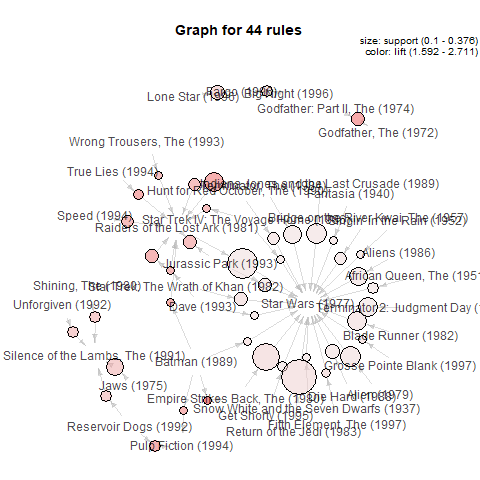

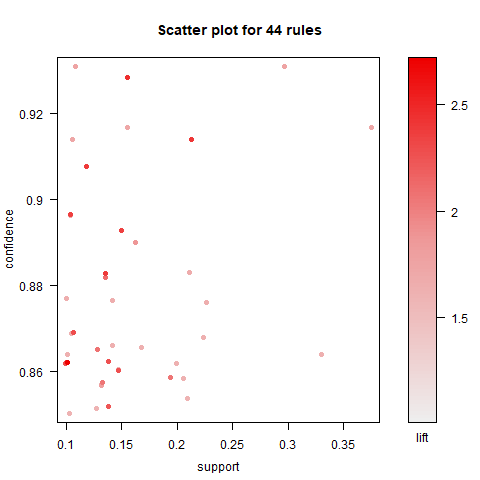

In [50]:
import rpy2.robjects as robjects

r_code=('''

library(tidyverse)
#设定工作路径
#注意此路径需要根据实际情况做调整
setwd("D://wd/Python/T01_教学/数据挖掘实验")
data_folder <- "datasets/ml-100k"
result_folder <- "tmp_results"
ratings_filename = file.path(data_folder, "u.data")
movie_info_filename = file.path(data_folder, "u.item")

#读取评分信息数据
rating_columns <- c("UserID", "MovieID", "Rating", "Datetime")
all_ratings <- read_delim(ratings_filename,
                       delim = '\t',
                       col_names = rating_columns)
all_ratings$Favorable = all_ratings$Rating > 3
ratings = all_ratings %>%
    filter(UserID <= 500)

#读取电影本身信息
moive_info_columns = c("MovieID", "Title", 'release_date', 'video_release_date',
                      'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                      'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                      'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi',
                      'Thriller', 'War', 'Western')
movie_info = read_delim(movie_info_filename,
                         delim="|",
                         col_names = moive_info_columns)

#通过连接将编号替换成电影名
ratings = merge(ratings[, c('UserID', 'MovieID', 'Rating', 'Favorable')], 
                movie_info[, c('MovieID', 'Title')],
                by.x = "MovieID", by.y = "MovieID",
                all.x = TRUE, all.y = FALSE)
                
#转换成列表
#通过这个例子，可以看出tidyverse这种编码风格的简洁明了之处
favorable_movie_list <- ratings %>%
    mutate(MovieID = as.character(MovieID)) %>%
    filter(Favorable == TRUE) %>%
    group_by(UserID) %>%
    summarise(favorable_movies = paste(Title, collapse = '\t')) %>%
    select(favorable_movies) %>%
    as_vector() %>%
    strsplit(split = "\t")
favorable_movie_list <- lapply(favorable_movie_list, unique)


#加载关联规则挖掘包
library(arules)
#将列表转换成事务记录
favorable_movie_trans <- as(favorable_movie_list, "transactions")
#挖掘关联规则
irules <- apriori(
    favorable_movie_trans,
    parameter = list(
        minlen = 2,
        maxlen = 2,
        supp = 50 / length(favorable_movie_trans), #最小支持度，减少偶然性
        conf = 0.85 #最小置信度，推断能力
    ))

#对关联规则进行可视化
library(arulesViz)
png(file.path(result_folder, "arules_graph.png"))
plot(irules,
     method = "graph")
dev.off()


png(file.path(result_folder, "arules_support_conf_lift.png"))
plot(irules,
     method = "scatterplot")
dev.off()

''')

#执行以上R代码
robjects.r(r_code)


#执行以上语句，在tmp_results文件夹下生成arules_XXXX.png文件，然后再Jupyter中进行显示
from IPython.display import display, Image
rules_image_path = "tmp_results/arules_graph.png"
display(Image(filename=rules_image_path))

rules_image_path = "tmp_results/arules_support_conf_lift.png"
display(Image(filename=rules_image_path))

## 小结

在这个小实验中，只是利用Apriori这个最经典的算法，做了关联规则的一些初步尝试。为了提升效率，也可以尝试一下FP-Growth等方法，既可以自行写算法实现，也可以调用[mlxtend](http://rasbt.github.io/mlxtend)、[Orange-Associate](https://orange3-associate.readthedocs.io/en/latest/scripting.html)、pyspark等。<br>

---

关于电影推荐，除了关联规则之外，其他的一些经典算法，如协同过滤、基于二部图的推荐算法、基于奇异值分解SVD的推荐算法等，均值得进一步探讨。
